In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
cut_range = tuple([(i+10)/10 for i in range(1,11)])
dens_range = tuple([i/100 for i in range(5,85,5)])
beads_range = tuple([i for i in range(10,50, 4) if i not in (38,46)])

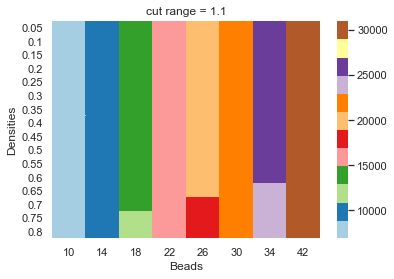

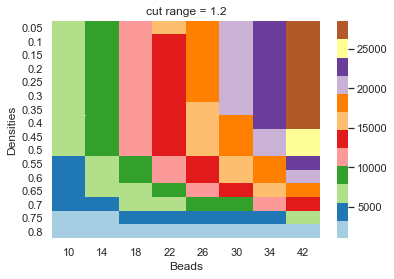

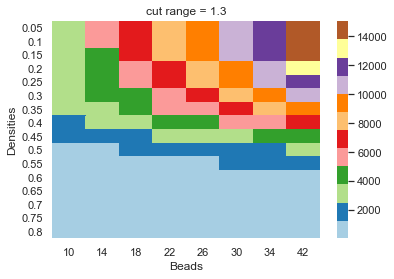

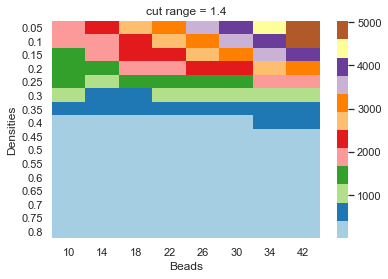

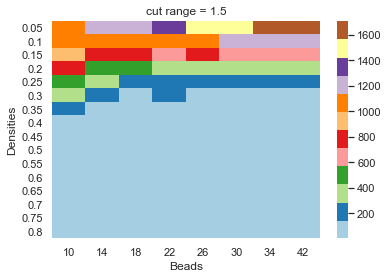

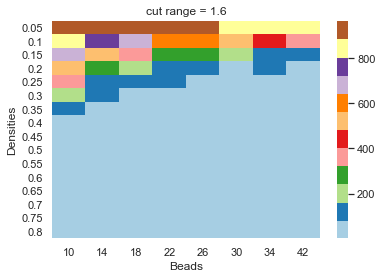

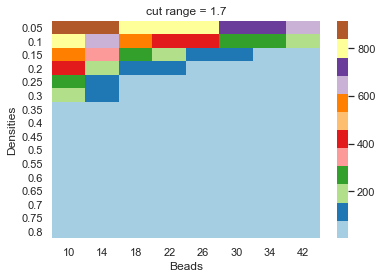

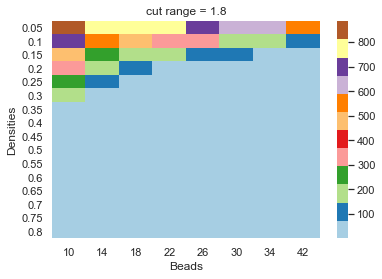

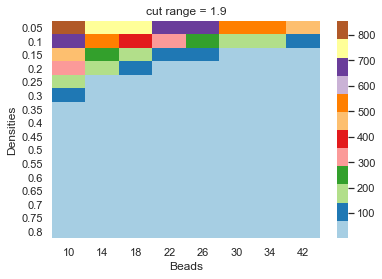

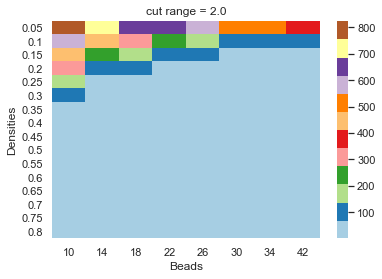

In [24]:
for i in cut_range:
    data = pd.read_csv(f'{i}/Frac_0.25', index_col='Densities')
    ax = plt.axes()
    sns.heatmap(data, xticklabels=True, cmap='Paired')
    ax.set_title(f'cut range = {i}')
    plt.xlabel('Beads')
    plt.savefig(f'plots/25/{i}.png')
    plt.show()

In [4]:
d = {
    '10': ('D','E','G/E','G','G','G/E','G/E','G','G','G','G/E','G/E','G/E','G','G','G'),
    '14': ('D','D','D','D','E','E','E','G/E','G/E','G/E','G','G','G','G','D','D'),
    '18': ('D','D','D','E','E','E','E','E/C','E/C','E/C','E/C','E','G/E','G','G','D'),
    '22': ('D','D','D/E','E','E','E','E','E','E','E','E','E','E','E/C','G','G'),
    '26': ('D','D','D/E','E','E','E','E/C','E','E','E/C','E','E','G/E','G/C','G','G/D'),
    '30': ('D','D','D','D','E','E','E/C','E/C','E/C','E','E','E','E','G/E','G','G'),
    '34': ('D','D','E','E','E','E','E/C','E/C','E','E','E','E','E/C','G','G','D'),
    '42': ('D','D','D/E','E','E','E','E','E','E','E','E','E/C','G/E','G','G/D','D')
}
df = pd.DataFrame(d, index=dens_range)

In [5]:
value_to_int = {value: i for i, value in enumerate(sorted(pd.unique(df.values.ravel())))}
value_to_int

{'D': 0, 'D/E': 1, 'E': 2, 'E/C': 3, 'G': 4, 'G/C': 5, 'G/D': 6, 'G/E': 7}

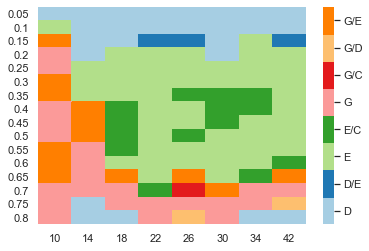

In [6]:
n = len(value_to_int)
cmap = sns.color_palette("Paired", n) 
ax = sns.heatmap(df.replace(value_to_int), cmap=cmap)
colorbar = ax.collections[0].colorbar 
r = colorbar.vmax - colorbar.vmin 
colorbar.set_ticks([colorbar.vmin + r / n * (0.5 + i) for i in range(n)])
colorbar.set_ticklabels(list(value_to_int.keys()))  
plt.xlabel('beads'); plt.ylabel()
plt.show()